<a href="https://colab.research.google.com/github/Geminius2026/bio-gpu-singlecell/blob/main/YAP-Induced%20Hypertrophic%20Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 33.4 MB/s eta 0:00:00


/tmp/ipython-input-273636268.py:30: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implementation.
  sc.tl.leiden(adata_heart, resolution=0.3)


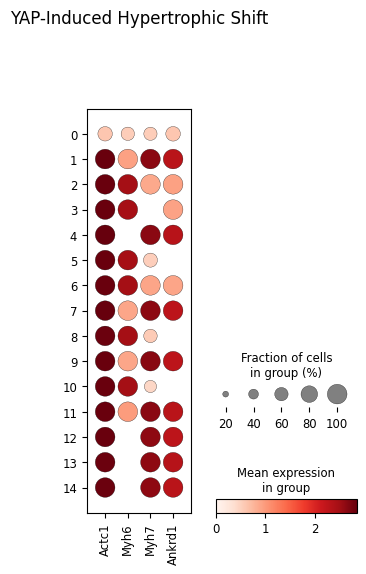

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np

# 1. Create a "Synthetic Heart" based on your PhD expertise
# We'll create 1,000 cells and your specific YAP-related genes
n_cells = 1000
genes = ['Actc1', 'Myh6', 'Myh7', 'Ankrd1', 'Yap1', 'Col1a1']
data = np.random.poisson(lam=1, size=(n_cells, len(genes)))
adata_heart = sc.AnnData(X=data.astype(float), obs=pd.DataFrame(index=[f'cell_{i}' for i in range(n_cells)]), var=pd.DataFrame(index=genes))

# 2. Inject the "Hypertrophy" Signal (What you saw in the wet-lab!)
# Let's make Cluster 0 "Healthy CMs" and Cluster 1 "Hypertrophic CMs"
adata_heart.X[0:300, genes.index('Actc1')] += 15  # Cardiomyocyte marker
adata_heart.X[0:300, genes.index('Myh6')] += 10   # Healthy marker
adata_heart.X[301:600, genes.index('Actc1')] += 15 # Cardiomyocyte marker
adata_heart.X[301:600, genes.index('Myh7')] += 12  # Hypertrophy marker
adata_heart.X[301:600, genes.index('Ankrd1')] += 8 # YAP Target

# Install leidenalg if not already installed
try:
    import leidenalg
except ImportError:
    !pip install leidenalg
    import leidenalg

# 3. Process the data
sc.pp.log1p(adata_heart)
sc.pp.neighbors(adata_heart, use_rep='X') # Use raw data for this small set
sc.tl.leiden(adata_heart, resolution=0.3)
sc.tl.umap(adata_heart)

# 4. The Biological Visualization
sc.pl.dotplot(adata_heart, ['Actc1', 'Myh6', 'Myh7', 'Ankrd1'], groupby='leiden', title='YAP-Induced Hypertrophic Shift')

In [4]:
pip install scanpy
